## Observations and Insights 

In [130]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results,
                              how='outer', on='Mouse ID')
# Display the data table for preview
combined_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [131]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [132]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [133]:
## Checking the number of mice.

mouse_count = combined_mouse_data.nunique().loc['Mouse ID']

print('Total Mice: ',mouse_count)

Total Mice:  249


In [134]:
# KL: count unique mice

In [135]:
## Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# 1893
clean_df=combined_mouse_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
len(clean_df)

total_mouse_count = combined_mouse_data.loc[:, 'Mouse ID'].count()
total_mouse_count

1893

In [136]:
# Optional: Get all the data for the duplicate mouse ID. 

In [137]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

In [138]:
# Checking the number of mice in the clean DataFrame.

## Summary Statistics

In [139]:
## Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
## Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
## mean, median, variance, standard deviation, and SEM of the tumor volume. 
## Assemble the resulting series into a single summary dataframe.

clean_df.loc[:, ['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').mean()

mean_df=clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
sum_df=clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sum()
variance_df=clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_df=clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_df=clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

pd.concat([mean_df, sum_df, variance_df,std_df, sem_df], axis=1)

,Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,9355.420462,24.947764,4.994774,0.329346
Ceftamin,52.591172,9361.228582,39.290177,6.268188,0.469821
Infubinol,52.884795,9413.493529,43.128684,6.567243,0.492236
Ketapril,55.235638,10384.299876,68.553577,8.279709,0.603860
Naftisol,54.331565,10105.671026,66.173479,8.134708,0.596466
Placebo,54.033581,9780.078122,61.168083,7.821003,0.581331
Propriva,52.393463,8173.380288,43.138803,6.568014,0.525862
Ramicane,40.216745,9169.417875,23.486704,4.846308,0.320955
Stelasyn,54.233149,9816.199991,59.450562,7.710419,0.573111


In [140]:
## Using the aggregation method, produce the same summary statistics in a single line

clean_df.loc[:, ['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').aggregate(['mean', 'median', 'var', 'std', 'sem'])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [141]:
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


Text(0, 0.5, 'Number of Mice')

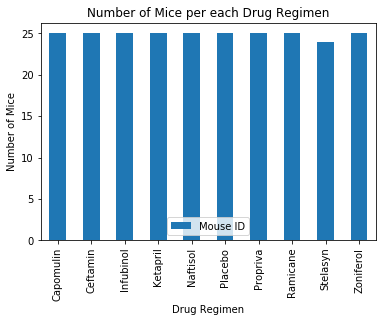

In [142]:
## Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# group by drug regimen and do a count of mouse id
clean_df.loc[:, ['Drug Regimen', 'Mouse ID']].drop_duplicates().groupby('Drug Regimen').count().plot(kind='bar')
plt.title("Number of Mice per each Drug Regimen")
plt.ylabel("Number of Mice")



In [143]:
mice_count=clean_df.loc[:, ['Mouse ID', 'Drug Regimen']].drop_duplicates()
mice_count

,Mouse ID,Drug Regimen
0,k403,Ramicane
10,s185,Capomulin
20,x401,Capomulin
30,m601,Capomulin
40,g791,Ramicane
...,...,...
1858,z314,Stelasyn
1860,z435,Propriva
1863,z581,Infubinol
1873,z795,Naftisol


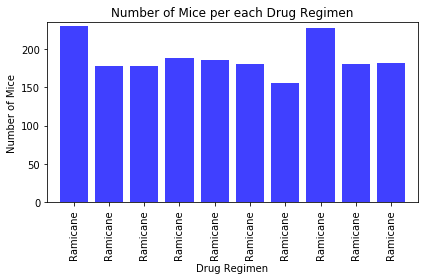

In [114]:
## Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
# Create an array that contains the number of users each language has
mice_count = sum_df=mice_per_drug
x_axis = np.arange(len(mice_count))

# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks
plt.bar(x_axis, mice_count, color= "b", alpha=.75, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, clean_df["Drug Regimen"], rotation=90)

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(mice_count)+5)

# Give our chart some labels and a tile
plt.title("Number of Mice per each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.tight_layout()

In [115]:
## Generate a pie plot showing the distribution of female versus male mice using pandas



Text(0.5, 1.0, 'Mouse Gender Distribution')

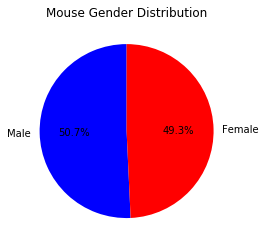

In [183]:
## Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender=clean_df.groupby('Sex')['Mouse ID'].count()
mice_gender

labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [958, 930]

# The colors of each section of the pie chart
colors = ["blue", "red"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=90)
plt.title("Mouse Gender Distribution")

## Quartiles, Outliers and Boxplots

In [184]:
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [188]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint=clean_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_data= pd.merge(max_timepoint, clean_df, how='outer', on='Mouse ID')

volume_max=combined_data.loc[:, ['Timepoint_x', 'Tumor Volume (mm3)', 'Drug Regimen']]
volume_max


,Timepoint_x,Tumor Volume (mm3),Drug Regimen
0,45,45.000000,Infubinol
1,45,48.508468,Infubinol
2,45,51.852437,Infubinol
3,45,52.777870,Infubinol
4,45,55.173336,Infubinol


In [177]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds


In [176]:


# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#tumor_size= combined_data('Tumor Volume (mm3)')

#fig1, ax1 =plt.subplots()
#ax1.set_title('Tumor Volume')
#ax1.set_ylabel('Tumor Volume (mm3)')
#ax1.boxplot(tumor_size)
#plt.show()

## Line and Scatter Plots

In [189]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df

,index,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
0,174,b128,45,Capomulin,Female,9,22,0,45.000000,0
1,175,b128,45,Capomulin,Female,9,22,5,45.651331,0
2,176,b128,45,Capomulin,Female,9,22,10,43.270852,0
3,177,b128,45,Capomulin,Female,9,22,15,43.784893,0
4,178,b128,45,Capomulin,Female,9,22,20,42.731552,0
...,...,...,...,...,...,...,...,...,...,...
225,1826,y793,45,Capomulin,Male,17,17,25,38.992734,2
226,1827,y793,45,Capomulin,Male,17,17,30,35.726023,2
227,1828,y793,45,Capomulin,Male,17,17,35,36.327870,2
228,1829,y793,45,Capomulin,Male,17,17,40,31.475411,2


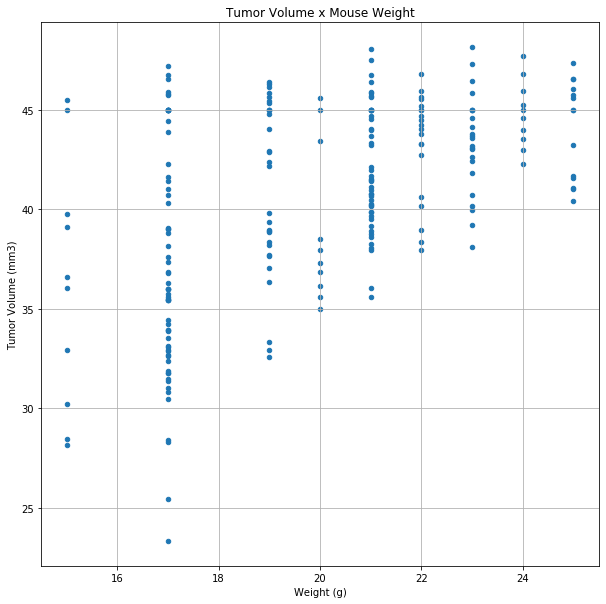

In [190]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(10,10), 
                  title="Capomulin Tumor Volume x Mouse Weight")


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
